#### 컬럼 : 17개 <hr>

- BMI (체질량지수): 체질량지수 (BMI)
- Smoking (흡연 여부): 평생 동안 담배를 100개비 이상 피운 적이 있습니까? (답변: 예 또는 아니오)
- AlcoholDrinking (음주): 과음자 (성인 남성은 주당 14잔 이상, 성인 여성은 주당 7잔 이상 음주하는 사람)
- Stroke (뇌졸중 여부): 뇌졸중을 진단받은 적이 있습니까?
- PhysicalHealth (신체 건강 상태): 지난 30일 동안 신체 건강이 좋지 않았던 날은 며칠이었습니까? (0-30일)
- MentalHealth (정신 건강 상태): 지난 30일 동안 정신 건강이 좋지 않았던 날은 며칠이었습니까? (0-30일)
- DiffWalking (보행 곤란): 걷거나 계단을 오르는데 심각한 어려움이 있습니까?
- Sex (성별): 당신은 남성입니까, 여성입니까?
- AgeCategory (연령 카테고리): 14단계 연령 카테고리
- Race (인종/민족): 추정된 인종/민족 값
- Diabetic (당뇨병 여부): 당뇨병 진단을 받은 적이 있습니까?
- PhysicalActivity (신체 활동 여부): 지난 30일 동안 일상적인 업무 외에 신체 활동이나 운동을 한 적이 있습니까?
- GenHealth (전반적인 건강 상태): 전반적으로 당신의 건강 상태는 어떻습니까?
- SleepTime (수면 시간): 24시간 기준으로 평균 몇 시간의 수면을 취하십니까?
- Asthma (천식 여부): 천식을 진단받은 적이 있습니까?
- KidneyDisease (신장 질환 여부): 신장 결석, 방광 감염 또는 요실금 제외, 신장 질환을 진단받은 적이 있습니까?
- SkinCancer (피부암 여부): 피부암을 진단받은 적이 있습니까?

[1] 모듈 로딩

In [115]:
#%pip install Flask


  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.0.4-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached werkzeug-3.0.4-py3-none-any.whl (227 kB)


In [113]:
#%pip install koreanize_matplotlib
#%pip install joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


[2] CSV => DataFrame

In [82]:
file_name='../DATA/real_heart_b.csv'
df=pd.read_csv(file_name)
df.drop(columns='Unnamed: 0', inplace=True)

In [83]:
df.reset_index(inplace=True, drop=True)

[3] 데이터 전처리

In [84]:
df = df[df.columns].replace({'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80 or older':13 })
df['AgeCategory'] = df['AgeCategory'].astype(int)

In [85]:
df = df[df.columns].replace({'Black':1, 'White':2, 'Other':3, 'American Indian/Alaskan Native':4, 'Asian':5, 'Hispanic':6})
df['Race'] = df['Race'].astype(int)

In [86]:
df = df[df.columns].replace({'Poor':1, 'Fair':2, 'Good':3, 'Very good':4, 'Excellent':5})
df['GenHealth'] = df['GenHealth'].astype(int)

[4] 데이터 분포 확인

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54746 entries, 0 to 54745
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  int64  
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  int64  
 3   AlcoholDrinking   54746 non-null  int64  
 4   Stroke            54746 non-null  int64  
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  int64  
 8   Sex               54746 non-null  int64  
 9   AgeCategory       54746 non-null  int32  
 10  Race              54746 non-null  int32  
 11  Diabetic          54746 non-null  int64  
 12  PhysicalActivity  54746 non-null  int64  
 13  GenHealth         54746 non-null  int32  
 14  SleepTime         54746 non-null  float64
 15  Asthma            54746 non-null  int64  
 16  KidneyDisease     54746 non-null  int64 

In [88]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,28.87,1,0,0,6.0,0.0,1,0,12,1,0,0,2,12.0,0,0,0
1,1,34.30,1,0,0,30.0,0.0,1,1,9,2,1,0,1,15.0,1,0,0
2,1,32.98,1,0,1,10.0,0.0,1,1,12,2,1,1,1,4.0,0,0,1
3,1,25.06,0,0,0,0.0,0.0,1,0,13,2,1,0,3,7.0,0,0,1
4,1,30.23,1,0,0,6.0,2.0,1,0,12,2,1,1,2,8.0,0,1,0


In [89]:
for i in df.columns:
    print(f"{i}의 종류 : {df[i].unique()}\n")

HeartDisease의 종류 : [1 0]

BMI의 종류 : [28.87 34.3  32.98 ... 25.41 55.95 46.49]

Smoking의 종류 : [1 0]

AlcoholDrinking의 종류 : [0 1]

Stroke의 종류 : [0 1]

PhysicalHealth의 종류 : [ 6. 30. 10.  0.  3.  2. 20.  5.  7.  1. 15. 21. 14. 18. 26. 25.  4. 12.
 16. 29. 28.  8.  9. 22. 17. 13. 27. 24. 23. 19. 11.]

MentalHealth의 종류 : [ 0.  2. 30. 20.  3.  5.  1. 15. 16. 12.  4.  7. 14. 10.  6. 25.  8. 22.
 28.  9. 13. 29. 21. 27. 24. 26. 11. 17. 18. 19. 23.]

DiffWalking의 종류 : [1 0]

Sex의 종류 : [0 1]

AgeCategory의 종류 : [12  9 13 11  8 10  7  6  4  5  2  3  1]

Race의 종류 : [1 2 3 4 5 6]

Diabetic의 종류 : [0 1]

PhysicalActivity의 종류 : [0 1]

GenHealth의 종류 : [2 1 3 4 5]

SleepTime의 종류 : [12. 15.  4.  7.  8. 10.  9.  6.  5.  3. 20. 11.  1. 18. 16.  2. 14. 24.
 19. 22. 13. 17.]

Asthma의 종류 : [0 1]

KidneyDisease의 종류 : [0 1]

SkinCancer의 종류 : [0 1]



[5] 전체 데이터 대상으로 학습

In [90]:
# 피쳐 타겟 분리
featureDF=df.drop(['HeartDisease'], axis = 1)
targetSR=df['HeartDisease']

print(f'featureDF => {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR => {targetSR.shape}, {targetSR.ndim}D')

featureDF => (54746, 17), 2D
targetSR => (54746,), 1D


In [91]:
# train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려 
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR,
                                                    random_state=10)

In [92]:
print(type(X_train), X_train)

<class 'pandas.core.frame.DataFrame'>          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
22061  26.29        1                0       0            30.0          25.0   
9167   18.65        1                0       1             0.0           0.0   
34786  27.12        1                0       0             0.0           0.0   
53514  25.84        1                0       0             5.0           0.0   
17090  51.75        1                0       0            30.0          30.0   
...      ...      ...              ...     ...             ...           ...   
39442  34.21        1                0       0             0.0           0.0   
13967  26.52        1                0       0             0.0          30.0   
40470  24.41        0                0       0             0.0          30.0   
3353   36.59        0                0       1            30.0           5.0   
47346  30.81        1                0       0             0.0           0.0   

 

In [93]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D') 
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test  : {X_test.shape}, {X_test.ndim}D') 
print(f'y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (43796, 17), 2D
y_train : (43796,), 1D
X_test  : (10950, 17), 2D
y_test  : (10950,), 1D


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [95]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [96]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행 
mmScaler.fit(X_train)

MinMaxScaler()

In [97]:
print(type(mmScaler.fit(X_train)),mmScaler.fit(X_train))

<class 'sklearn.preprocessing._data.MinMaxScaler'> MinMaxScaler()


In [98]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_mmscaled=mmScaler.transform(X_train)
X_train_mmscaled.shape, X_train_mmscaled.min(), X_train_mmscaled.max()

((43796, 17), 0.0, 1.0000000000000002)

In [99]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_mmscaled = mmScaler.transform(X_test)
X_test_mmscaled.shape, X_test_mmscaled.min(), X_test_mmscaled.max()

((10950, 17), 0.0, 1.0000000000000002)

In [100]:
# 인스턴스 생성
model=KNeighborsClassifier(n_neighbors=17)

> MinMaxScaler 사용하여 스케일링 후 학습 진행

In [101]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_mmscaled, y_train)

KNeighborsClassifier(n_neighbors=17)

In [102]:
# 혼동 행렬로 recall 값 확인
y_true = y_test
y_pred = model.predict(X_test_mmscaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      5475
           1       0.73      0.79      0.76      5475

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950



In [114]:
joblib.dump(model, 'knn_model.pkl')
joblib.dump(mmScaler, 'mmScaler.pkl')

['mmScaler.pkl']

[6-1] 중간 정리
- 1, recall 값 최대로 올리기
- 파라미터 조정으로는 0.79가 한계같다.

- 전체 데이터 상관관계 히트맵

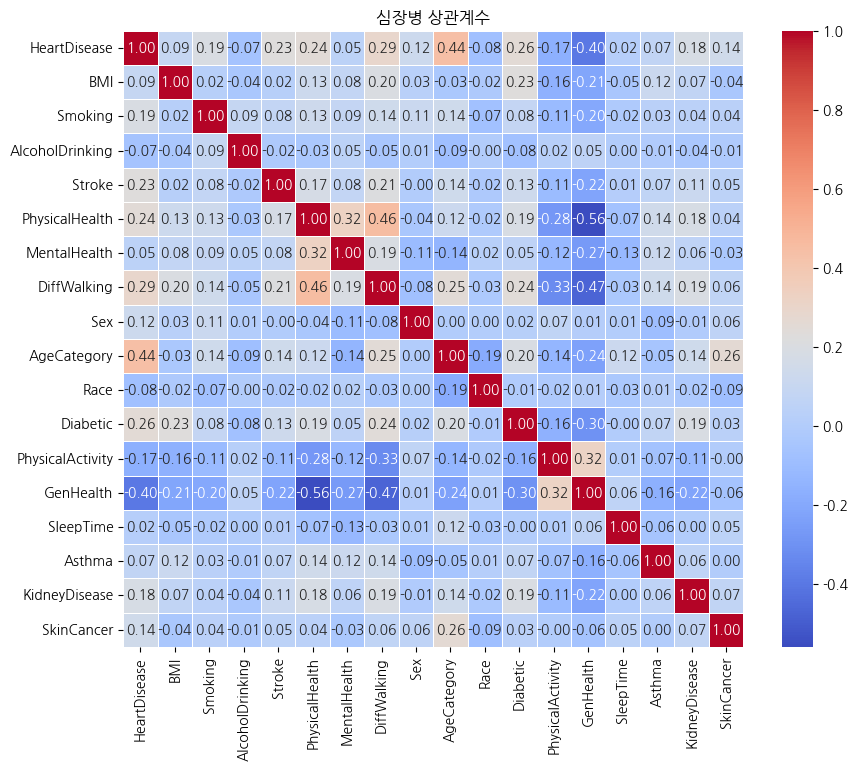

In [103]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('심장병 상관계수')
plt.show()

[7] 예측 하기 ===> 학습/훈련에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D 

In [104]:
input_data=[[38.98,0,1,27.,21.,1,0,1,3,0,1,4,5,11.,1,0,1]] # 임의의 데이터 생성

new_data = pd.DataFrame(input_data, columns=df.columns.drop('HeartDisease'))
new_data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,38.98,0,1,27.0,21.0,1,0,1,3,0,1,4,5,11.0,1,0,1


In [105]:
new_data_scaled=mmScaler.transform(new_data)
new_data_scaled

array([[ 0.36322931,  0.        ,  1.        , 27.        ,  0.7       ,
         0.03333333,  0.        ,  1.        ,  0.16666667, -0.2       ,
         1.        ,  4.        ,  1.        ,  0.43478261,  1.        ,
         0.        ,  1.        ]])

In [106]:
# 임의의 새로운 데이터의 예측
pred=model.predict(new_data_scaled)
print(pred.shape[0])


1


In [107]:
if pred.shape[0]==1:
    print("심장병 발병 가능성이 높습니다. 근 시일 내에 내원하여 담당의의 진료를 받으십시오.")
else : print("심장병 발병 가능성이 낮습니다.")

심장병 발병 가능성이 높습니다. 근 시일 내에 내원하여 담당의의 진료를 받으십시오.


In [108]:
# 위의 과정 함수화
def ml_predict(input_data_2d_17features): # 2차원 리스트 안에 17개 항목 넣어야함
    new_data = pd.DataFrame(input_data_2d_17features, columns=df.columns.drop('HeartDisease'))
    new_data_scaled=mmScaler.transform(new_data)
    pred=model.predict(new_data_scaled)

    if pred.shape[0]==1:
        print("심장병 발병 가능성이 높습니다. 근 시일 내에 내원하여 담당의의 진료를 받으십시오.")
    else : print("심장병 발병 가능성이 낮습니다.")

In [109]:
ml_predict(input_data)

심장병 발병 가능성이 높습니다. 근 시일 내에 내원하여 담당의의 진료를 받으십시오.
